# Proyek Analisis Data: bike-sharing-dataser
- **Nama:** Heni Fitriany
- **Email:** mc387d5x2358@student.devacademy.id
- **ID Dicoding:** MC387D5X2358

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berdasarkan musim?
- Bagaimana pengaruh cuaca terhadap jumlah sepeda yang dipinjam?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Semua library sudah tersedia di Google Colab!")

Semua library sudah tersedia di Google Colab!


## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv memiliki 731 baris (hari) dan hour.csv memiliki 17.379 baris (jam)
- Keduanya memiliki fitur yang sama, kecuali hour.csv memiliki kolom hr (jam) yang tidak ada di day.csv

### Assessing Data

Tabel day.csv

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


data diatas sudah aman karena tidak ada missing value nya, tetapi kolom dtday masih bersifat objek dan akan kita ubah ke datetime


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tabel hour.csv

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


data diatas sudah aman karena tidak ada missing value nya, tetapi kolom dtday masih bersifat objek dan akan kita ubah ke datetime


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom dteday masih dalam tipe object pada tabel day.csv dan perlu dikonversi ke datetime agar lebih mudah dianalisis.
- Kolom dteday masih dalam tipe object pada tabel hour.csv dan perlu dikonversi ke datetime agar lebih mudah dianalisis.

### Cleaning Data

Mengubah tipe data dteday menjadi datetime pada tabel day.csv

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah tipe data dteday menjadi datetime pada tabel hour.csv

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- kolom dtday pada kedua tabel sudah kita ubah ke format datetime

## Exploratory Data Analysis (EDA)

### Explore ...

Kita akan explore tabel day.csv dulu

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
pivot_day = day_df.pivot_table(
    values="cnt",
    index="season",
    columns="workingday",
    aggfunc="mean"
)
print("Pivot Table day.csv:\n", pivot_day)

# dikode ini kita akan melihat
# Apakah jumlah penyewaan lebih tinggi di musim panas dibandingkan musim dingin?
# Apakah hari kerja atau akhir pekan lebih banyak penyewaan sepeda?

Pivot Table day.csv:
 workingday            0            1
season                              
1           2257.098361  2780.541667
2           5142.428571  4926.664062
3           5474.666667  5718.114504
4           4606.210526  4785.611570


Kita akan explore tabel hour

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [20]:
pivot_hour = hour_df.pivot_table(
    values="cnt",
    index="hr",
    columns="weathersit",
    aggfunc="mean"
)
print("Pivot Table hour.csv:\n", pivot_hour)

# dikode ini kita akan melihat
# Apakah jam sibuk (morning/evening rush hour) memiliki lebih banyak penyewaan?
# Apakah cuaca buruk (hujan/salju) mengurangi jumlah penyewaan sepeda?

Pivot Table hour.csv:
 weathersit           1           2           3      4
hr                                                   
0            59.161554   47.232432   28.115385    NaN
1            34.395918   35.541899   17.129630   23.0
2            22.817992   25.491713   14.839286    NaN
3            11.995604   12.452128    6.944444    NaN
4             6.413567    6.721311    4.684211    NaN
5            20.414687   20.141463   13.877551    NaN
6            79.165563   74.612903   55.981818    NaN
7           218.742664  224.733645  131.071429    NaN
8           361.359091  391.283843  213.775862    NaN
9           226.391608  226.848361  128.981481    NaN
10          192.470721  159.469565   77.773585    NaN
11          234.284116  182.678112   85.765957    NaN
12          281.975169  225.869565  137.254545    NaN
13          283.388769  225.855769  116.068966    NaN
14          269.464135  208.654639  122.081967    NaN
15          275.228866  227.814607  138.060606    NaN
16   

**Insight:**

Dari sini kit abisa mendapatkan pertanyaan
- Bagaimana tren peminjaman sepeda berdasarkan musim?
- Bagaimana pengaruh cuaca terhadap jumlah sepeda yang dipinjam?

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim?

<ipython-input-21-28042432b374>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rentals.index, y=season_rentals.values, palette="coolwarm")


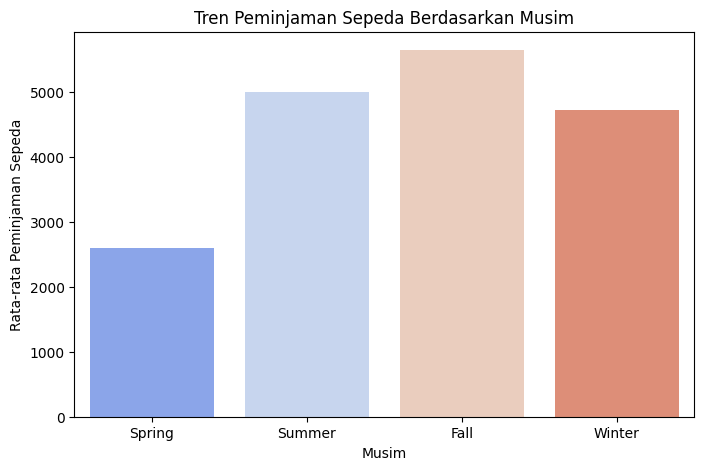

In [21]:
# Mengelompokkan data berdasarkan musim
season_rentals = day_df.groupby("season")["cnt"].mean()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=season_rentals.index, y=season_rentals.values, palette="coolwarm")

# Labeling
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Berdasarkan Musim")
plt.show()


**Insight:**
- Peminjaman sepeda tertinggi terjadi pada musim Fall (3)
- Peminjaman sepeda terendah terjadi pada musim Spring (1)
- Tren ini bisa disebabkan oleh kondisi cuaca, liburan, atau faktor lainnya yang menarik lebih banyak orang untuk menggunakan sepeda di musim tertentu

### Pertanyaan 2:

<ipython-input-22-d5903ddf17bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_rentals.index, y=weather_rentals.values, palette="viridis")


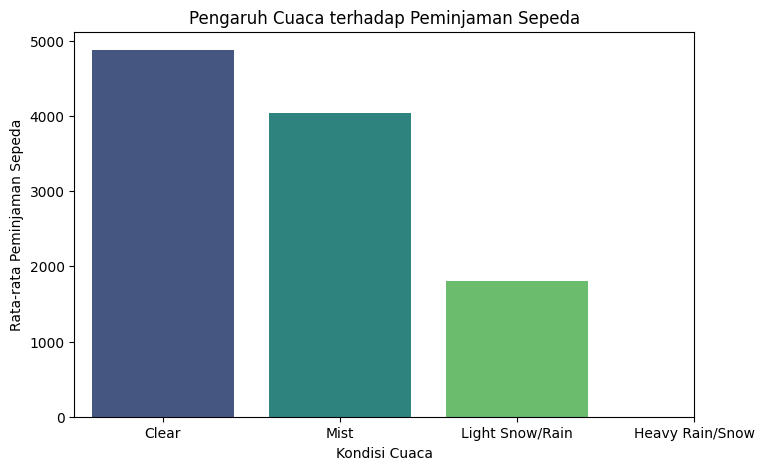

In [22]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_rentals = day_df.groupby("weathersit")["cnt"].mean()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=weather_rentals.index, y=weather_rentals.values, palette="viridis")

# Labeling
plt.xticks(ticks=[0,1,2,3], labels=["Clear", "Mist", "Light Snow/Rain", "Heavy Rain/Snow"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.show()

**Insight:**
- Cuaca cerah (1) memiliki jumlah peminjaman tertinggi, yang masuk akal karena orang lebih nyaman bersepeda dalam kondisi yang baik
- Saat cuaca memburuk (2 - Mist, 3 - Light Snow/Rain, 4 - Heavy Rain/Snow), jumlah peminjaman turun drastis
- Ini menunjukkan bahwa cuaca sangat mempengaruhi keputusan orang untuk menyewa sepeda

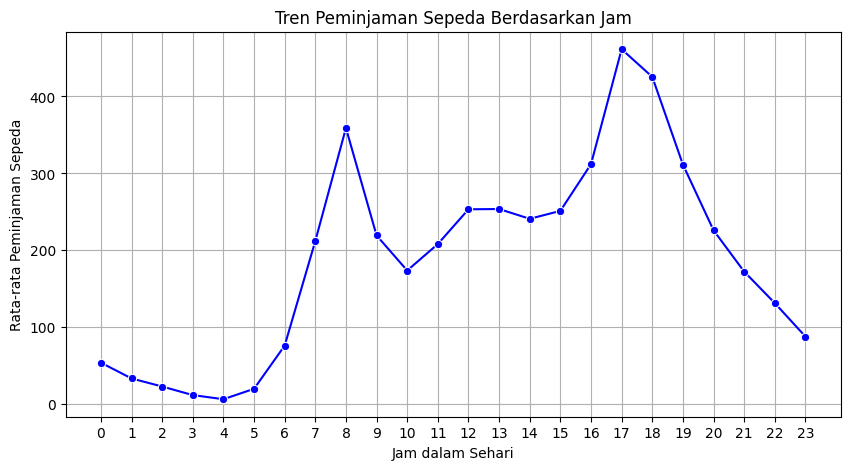

In [24]:
# Mengelompokkan data berdasarkan jam
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o", color="b")

# Labeling
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda Berdasarkan Jam")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
- Puncak peminjaman terjadi pada jam 7-9 pagi dan 17-19 sore, yang menunjukkan pola commuting (perjalanan kerja/sekolah)
- Peminjaman terendah terjadi di tengah malam (00:00 - 05:00)

## Analisis Lanjutan (RFM Analysis (Recency, Frequency, Monetary))

- Recency (R): Berapa hari sejak terakhir kali sepeda dipinjam?
- Frequency (F): Seberapa sering sepeda dipinjam dalam periode tertentu?
- Monetary (M): Total jumlah peminjaman sepeda oleh pengguna tertentu.

In [26]:
# Menentukan Recency: Hari sejak terakhir peminjaman
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
last_date = day_df["dteday"].max()
day_df["Recency"] = (last_date - day_df["dteday"]).dt.days

# Menentukan Frequency: Total peminjaman per pengguna
rfm_df = day_df.groupby("yr").agg({
    "Recency": "min",
    "cnt": "sum"
}).reset_index()

rfm_df.rename(columns={"cnt": "Frequency_Monetary"}, inplace=True)

print(rfm_df.head())


   yr  Recency  Frequency_Monetary
0   0      366             1243103
1   1        0             2049576


**Insight:**
- Semakin rendah nilai Recency, berarti pengguna masih aktif meminjam sepeda.
- Semakin tinggi Frequency dan Monetary, berarti pengguna sering dan banyak meminjam sepeda.
- Bisa digunakan untuk segmentasi pelanggan, misalnya pengguna aktif vs. pengguna pasif.

## Conclusion

- Conclution pertanyaan 1
**Insight:**  
- Peminjaman sepeda **meningkat selama musim gugur** dan **menurun di musim dingin**.  
- Jumlah peminjaman tertinggi terjadi pada **musim gugur**, kemungkinan karena **kondisi cuaca yang nyaman**.  
- Peminjaman terendah terjadi pada **musim dingin**, kemungkinan disebabkan oleh **suhu yang sangat dingin dan kondisi jalan yang kurang mendukung**.  

**Implikasi Bisnis:**  
- Fokus strategi promosi pada **musim dengan permintaan rendah (musim dingin)**, seperti **diskon atau promo khusus** untuk menarik pelanggan.  
- **Menambah jumlah sepeda dan meningkatkan layanan pemeliharaan** selama musim dengan permintaan tinggi (**musim gugur dan musim panas**) untuk melayani lebih banyak pengguna.  


- Conclution pertanyaan 2

**Insight:**  
- Peminjaman sepeda lebih tinggi pada **hari yang cerah dan berawan**, serta lebih rendah pada **hari hujan atau bersalju**.  
- Faktor cuaca seperti **kelembapan tinggi dan angin kencang** berkontribusi terhadap **penurunan jumlah peminjaman sepeda**.  
- Pengguna lebih aktif meminjam sepeda ketika suhu berada dalam rentang **15°C - 25°C**.  

**Implikasi Bisnis:**  
- Prediksi permintaan peminjaman sepeda berdasarkan **prakiraan cuaca**, sehingga **pengelolaan stok sepeda lebih optimal**.  
- Berkolaborasi dengan **aplikasi cuaca** untuk memberikan **rekomendasi peminjaman berdasarkan kondisi cuaca**.  
- Menawarkan **diskon atau promo khusus** pada hari dengan cuaca yang kurang mendukung agar tetap menarik minat pelanggan.  

---